In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Manejo de faltantes
Podemos observar que hay 3 columnas con faltantes, 'edad', 'Cabin' y 'embarked'. veamos y tratemos estas columnas.

In [6]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Observamos que hay demasiados tipos para la columna Cabin, por lo que la eliminaremos.

In [7]:
median = train.Age.median()

Rellenamos la columna Age, con la mediana.

In [8]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

Rellenamos embarked con el siguiente del dataframe.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Tomemos las columnas tipo Object dentro de un array.

In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Tomamos las columnas object pero eliminamos la columna name ya que no es necesaria


In [11]:

object_cols = ['Sex','Ticket', 'Embarked']
train.drop(['Name'], axis=1, inplace=True)

Hagamos un mapa de calor para buscar relaciones entre las columnas numericas.

In [12]:
train_num = train.drop(['Sex','Ticket','Embarked', 'Cabin'], axis=1)


<Axes: >

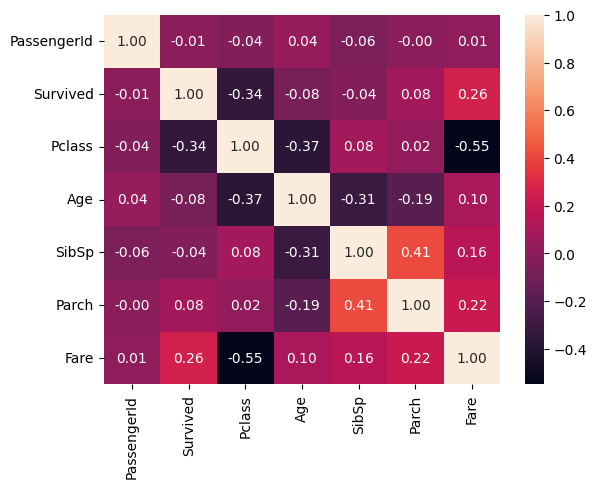

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(train_num.corr(), square = False, annot=True, fmt= '.2f')

In [14]:
train_num = train_num[['Fare','Survived','Pclass']]
train_num

,Fare,Survived,Pclass
0,7.2500,0,3
1,71.2833,1,1
2,7.9250,1,3
3,53.1000,1,1
4,8.0500,0,3
...,...,...,...
886,13.0000,0,2
887,30.0000,1,1
888,23.4500,0,3
889,30.0000,1,1


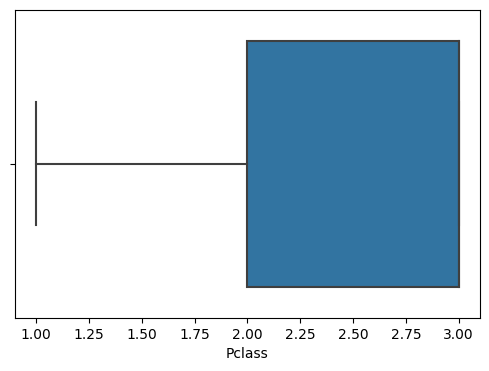

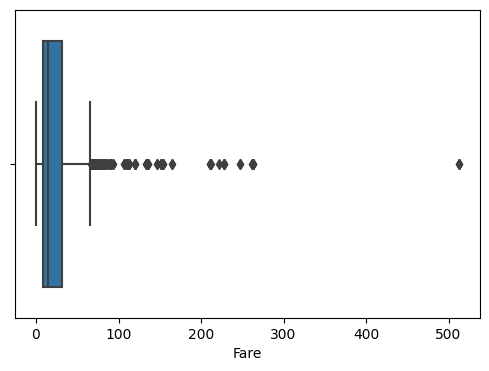

In [15]:
figure = plt.figure(figsize=(6,4))
sns.boxplot(x=train_num['Pclass'])
plt.show()
figure = plt.figure(figsize=(6,4))
sns.boxplot(x=train_num['Fare'])
plt.show()



Podemos observar Outliers en la columna Fare, esto no nos sorprende ya que se debe a la tarifa que pago el pasajero, haciendo evidente que la mejor de las clases debe ser el outlier que vemos mientras que la gran mayoria pago el pasaje estandar.

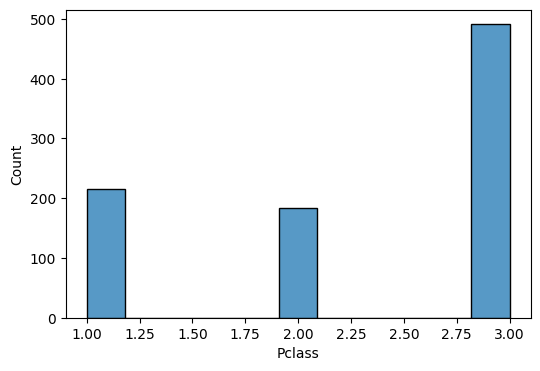

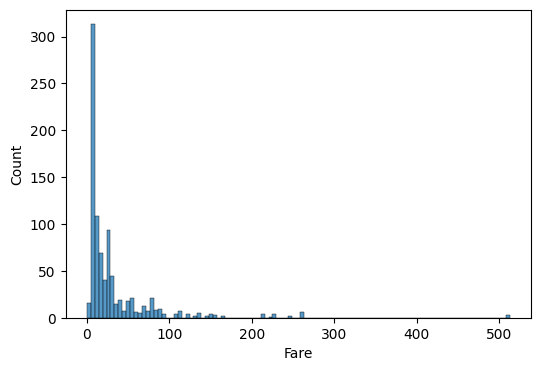

In [16]:
figure = plt.figure(figsize=(6,4))
sns.histplot(train['Pclass'])
plt.show()
figure = plt.figure(figsize=(6,4))
sns.histplot(train['Fare'])
plt.show()



In [17]:
train_cat = train[object_cols]
train_cat.head()

,Sex,Ticket,Embarked
0,male,A/5 21171,S
1,female,PC 17599,C
2,female,STON/O2. 3101282,S
3,female,113803,S
4,male,373450,S


In [18]:
train_cat.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

Descartamos Ticket, y consevamos Sex y Embarked.

In [19]:
train_cat.drop(['Ticket'], axis=1, inplace=True)

/tmp/ipykernel_20/1580851236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat.drop(['Ticket'], axis=1, inplace=True)


In [20]:
print(train_cat.Sex.value_counts())
print('-'*50)
print(train_cat.Embarked.value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
--------------------------------------------------
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Realizamos los cambios a las variables categoricas para que el modelo pueda leerlos.


In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

class EliminarColumnas(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X[['Pclass','Sex','Fare','Embarked', 'SibSp', 'Parch']]
        return X
    
class ImputarFaltantes(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['Embarked'] = X['Embarked'].ffill()
        X['Fare'] = X['Fare'].ffill()
        return X
    
class TransformarCategorias(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        sex_dct = {'female': 1, 'male': 0}
        X['Sex'] = [sex_dct[g] for g in X['Sex']]
        
        encoder = OneHotEncoder()

        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        job_columns = ['S','C','Q']
        for i in range(len(matrix.T)):
            X[job_columns[i]] = matrix.T[i]
        
        X.drop(['Embarked'], axis=1, inplace=True)
        return X

In [23]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('eliminar_columnas', EliminarColumnas()),
    ('imputar_faltantes', ImputarFaltantes()),
    ('transformar_categorias', TransformarCategorias())
])

In [24]:
train_fin = pipe.fit_transform(train)


/tmp/ipykernel_20/48911206.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].ffill()
/tmp/ipykernel_20/48911206.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = X['Fare'].ffill()
/tmp/ipykernel_20/48911206.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [25]:
X_train = train_fin.copy()
y_train = train['Survived']

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance

In [27]:
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC()

In [28]:
# Creamos array con los nombres de los models
clasificadores = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','LogisticRegression','SVM']

# una lista vacia para el puntaje
scores = []

# y una lista con los modelos para sacar el puntaje
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_xg, clf_lr, clf_svm]
# iteramos sobre los modelos y agregamos dentro de score el puntaje
for model in models:
    score = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [29]:
# creamos una tabla con los puntajes.
puntajes = pd.DataFrame(scores, index = clasificadores, columns = ['score']).sort_values(by = 'score',
             ascending = False)
puntajes

,score
Bagging,0.807004
DecisionTree,0.802534
XGBoost,0.800250
ExtraTrees,0.800250
AdaBoost,0.794644
RandomForest,0.792409
LogisticRegression,0.784519
SVM,0.670112


In [30]:
# creamos una funcion grilla que entrena los datos de nuestro set de
# entrenamiento y devuelve el mejor puntaje y los mejores parametros
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10,
                        scoring = 'accuracy')
    grid.fit(X_train, y_train)
    return grid.best_score_, grid.best_estimator_.get_params()

In [31]:
# Creamos la grilla de parametros para cada modelo seleccionado

parametros_bc = {
    'n_estimators': [10, 50, 100, 150],
    'max_samples': [0.5, 0.7, 0.9, 1.0],
    'max_features': [0.5, 0.7, 0.9, 1.0]
}
parametros_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
parametros_et = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [32]:
best_score_bc, best_params_bc = grid(clf_bc,parametros_bc)
print(best_score_bc)


0.8159925093632958


In [33]:
best_score_dt, best_params_dt = grid(clf_dt,parametros_dt)
print(best_score_dt)

0.8081148564294631


In [34]:
best_score_et, best_params_et = grid(clf_et, parametros_et)
print(best_score_et)
best_params_et

0.8170786516853932


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
modelo_final = ExtraTreesClassifier(max_depth=15, min_samples_split=2, min_samples_leaf=2)

In [36]:
X_test = pipe.fit_transform(test)

/tmp/ipykernel_20/48911206.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].ffill()
/tmp/ipykernel_20/48911206.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = X['Fare'].ffill()
/tmp/ipykernel_20/48911206.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Fare    418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   S       418 non-null    float64
 6   C       418 non-null    float64
 7   Q       418 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [38]:
modelo_final.fit(X_train, y_train)
predictions = modelo_final.predict(X_test)

In [39]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
